<a href="https://colab.research.google.com/github/mjavadpur/SVM/blob/main/Heart_Failure_PredictionSVM_S3_MJavadpur.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div style="border-radius:10px;
            border : black solid;
            background-color: 	#FFFFF0;
            font-size:110%;
            text-align: left">

<h2 style='; border:0; border-radius: 10px; font-weight: bold; color:black'><center>About the data (Description of attributes)</center></h2>  
    
* **age:** Age of the patient 
* **anaemia:** Haemoglobin level of patient (Boolean) 
* **creatinine_phosphokinase:** Level of the CPK enzyme in the blood (mcg/L)
* **diabetes:** If the patient has diabetes (Boolean)
* **ejection_fraction:** Percentage of blood leaving the heart at each contraction
* **high_blood_pressure:** If the patient has hypertension (Boolean) 
* **platelets:** Platelet count of blood (kiloplatelets/mL)
* **serum_creatinine:** Level of serum creatinine in the blood (mg/dL)
* **serum_sodium:** Level of serum sodium in the blood (mEq/L)
* **sex:** Sex of the patient
* **smoking:** If the patient smokes or not (Boolean) 
* **time:** Follow-up period (days) 
* **DEATH_EVENT:** If the patient deceased during the follow-up period (Boolean)

**[Attributes having Boolean values:** 0 = Negative (No); 1 = Positive (Yes)]

# Step 1: Import Libararies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Step 2:  Import Dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
data=pd.read_csv('/content/drive/MyDrive/Workshop/SVM/heart_failure_clinical_records_dataset.csv')

# Step 3: Dataset overview

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [5]:
data.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [6]:
df = data.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [7]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [8]:
df.shape


(299, 13)

In [9]:
#checking null values

df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [10]:
df['DEATH_EVENT'].value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

In [11]:
df['DEATH_EVENT'].value_counts()/df.shape[0]*100

0    67.892977
1    32.107023
Name: DEATH_EVENT, dtype: float64

In [12]:
corr = df.corr()
corr['DEATH_EVENT'].sort_values(ascending=False)

DEATH_EVENT                 1.000000
serum_creatinine            0.294278
age                         0.253729
high_blood_pressure         0.079351
anaemia                     0.066270
creatinine_phosphokinase    0.062728
diabetes                   -0.001943
sex                        -0.004316
smoking                    -0.012623
platelets                  -0.049139
serum_sodium               -0.195204
ejection_fraction          -0.268603
time                       -0.526964
Name: DEATH_EVENT, dtype: float64

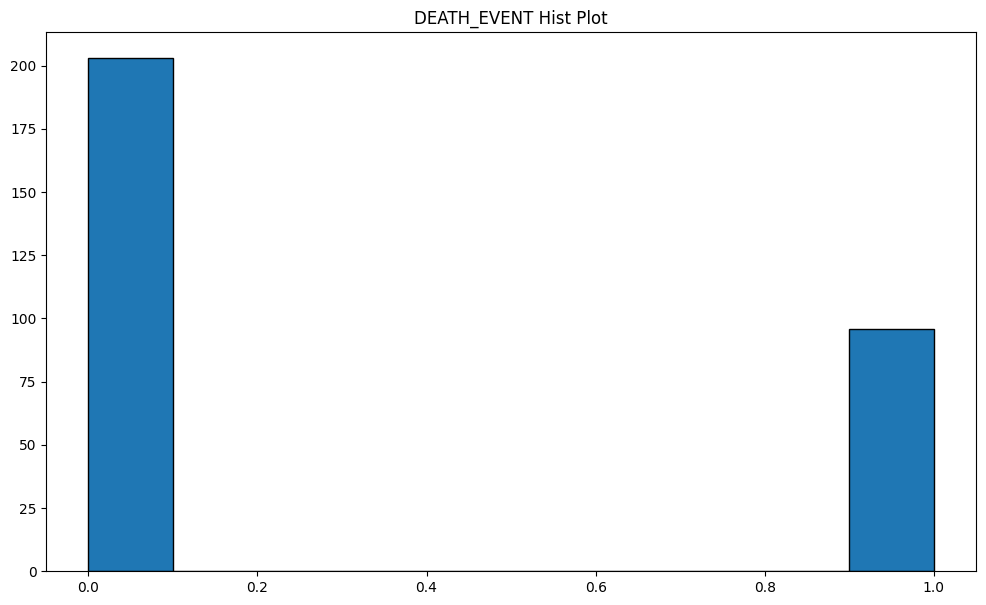

In [13]:
plt.figure(figsize=(12,7))
plt.hist("DEATH_EVENT",data=df, edgecolor="k")
plt.title("DEATH_EVENT Hist Plot")
plt.show()

# Step 4: EDA

Text(0.5, 1.05, 'DEATH_EVENT variable distribution')

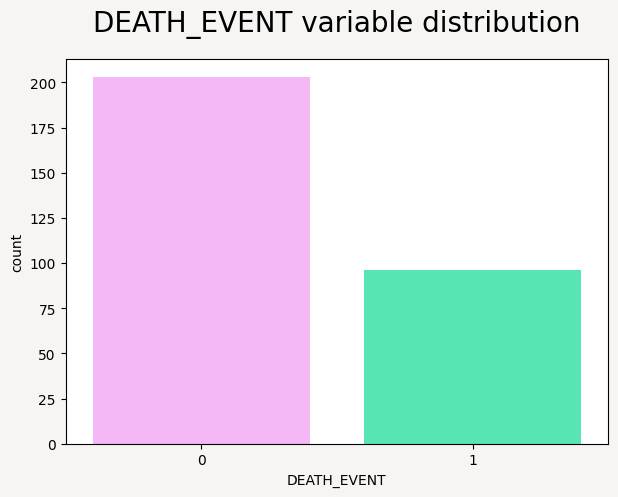

In [14]:
mypal=['#FC05FB', '#FEAEFE', '#FCD2FC','#F3FEFA', '#B4FFE4','#3FFEBA']
plt.figure(figsize=(7,5),facecolor='#F6F5F4')
ax=sns.countplot(x=df['DEATH_EVENT'],palette=mypal[1::4])

ax.set_title("DEATH_EVENT variable distribution", fontsize=20, y=1.05)

In [15]:
corr_df=df[['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT']]

<Axes: >

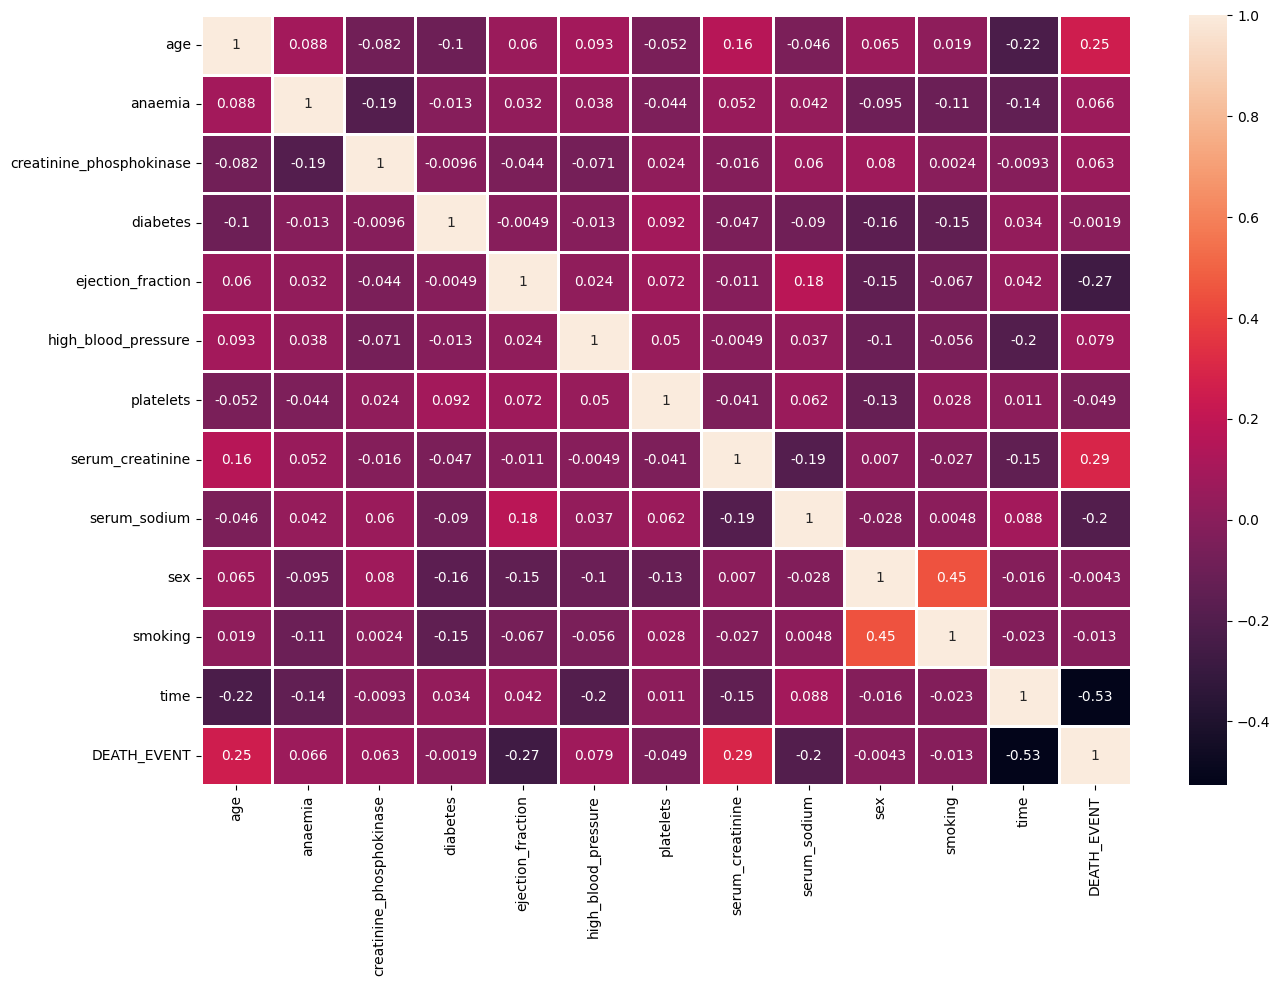

In [16]:
plt.figure(figsize=(15,10))
sns.heatmap(corr_df.corr(),annot=True,linewidth=2)

<Axes: >

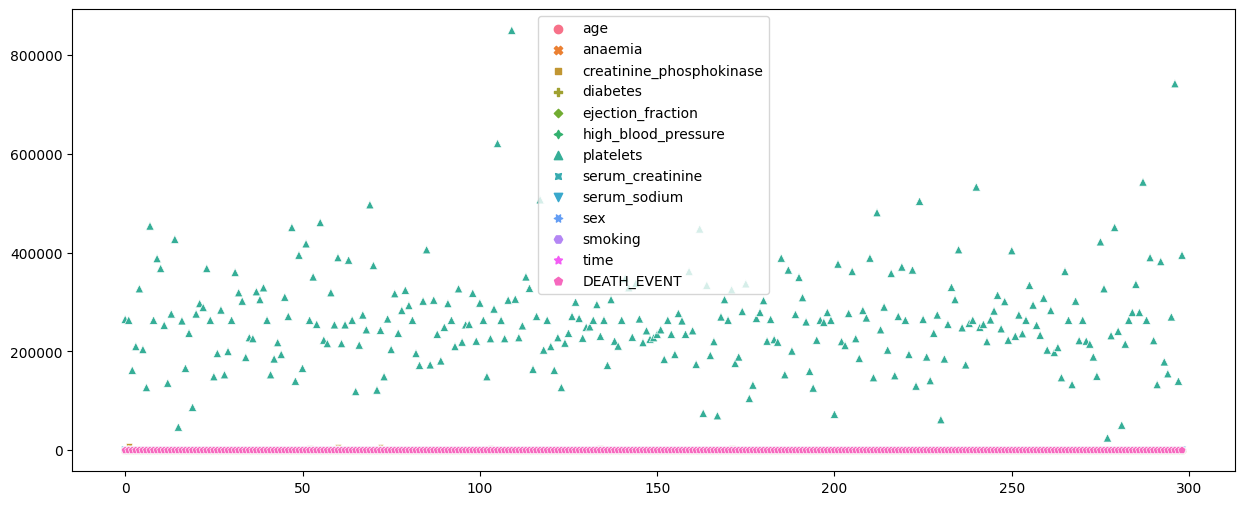

In [17]:
plt.figure(figsize = (15, 6))
sns.scatterplot(data=df)

<Axes: xlabel='creatinine_phosphokinase', ylabel='serum_creatinine'>

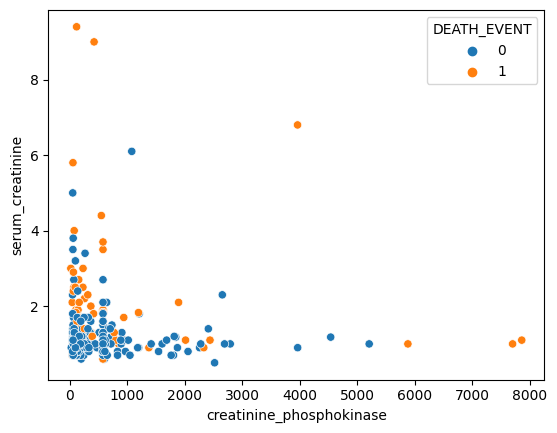

In [18]:
# 'age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
#        'ejection_fraction', 'high_blood_pressure', 'platelets',
#        'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
#        'DEATH_EVENT'
sns.scatterplot(data=df, x='creatinine_phosphokinase', y='serum_creatinine', hue='DEATH_EVENT')

In [19]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [20]:
categorical_features = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']

numerical_features = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium','time']



print('Categorical Features are : ', categorical_features)

print('Continuous Features are : ', numerical_features)




Categorical Features are :  ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']
Continuous Features are :  ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']


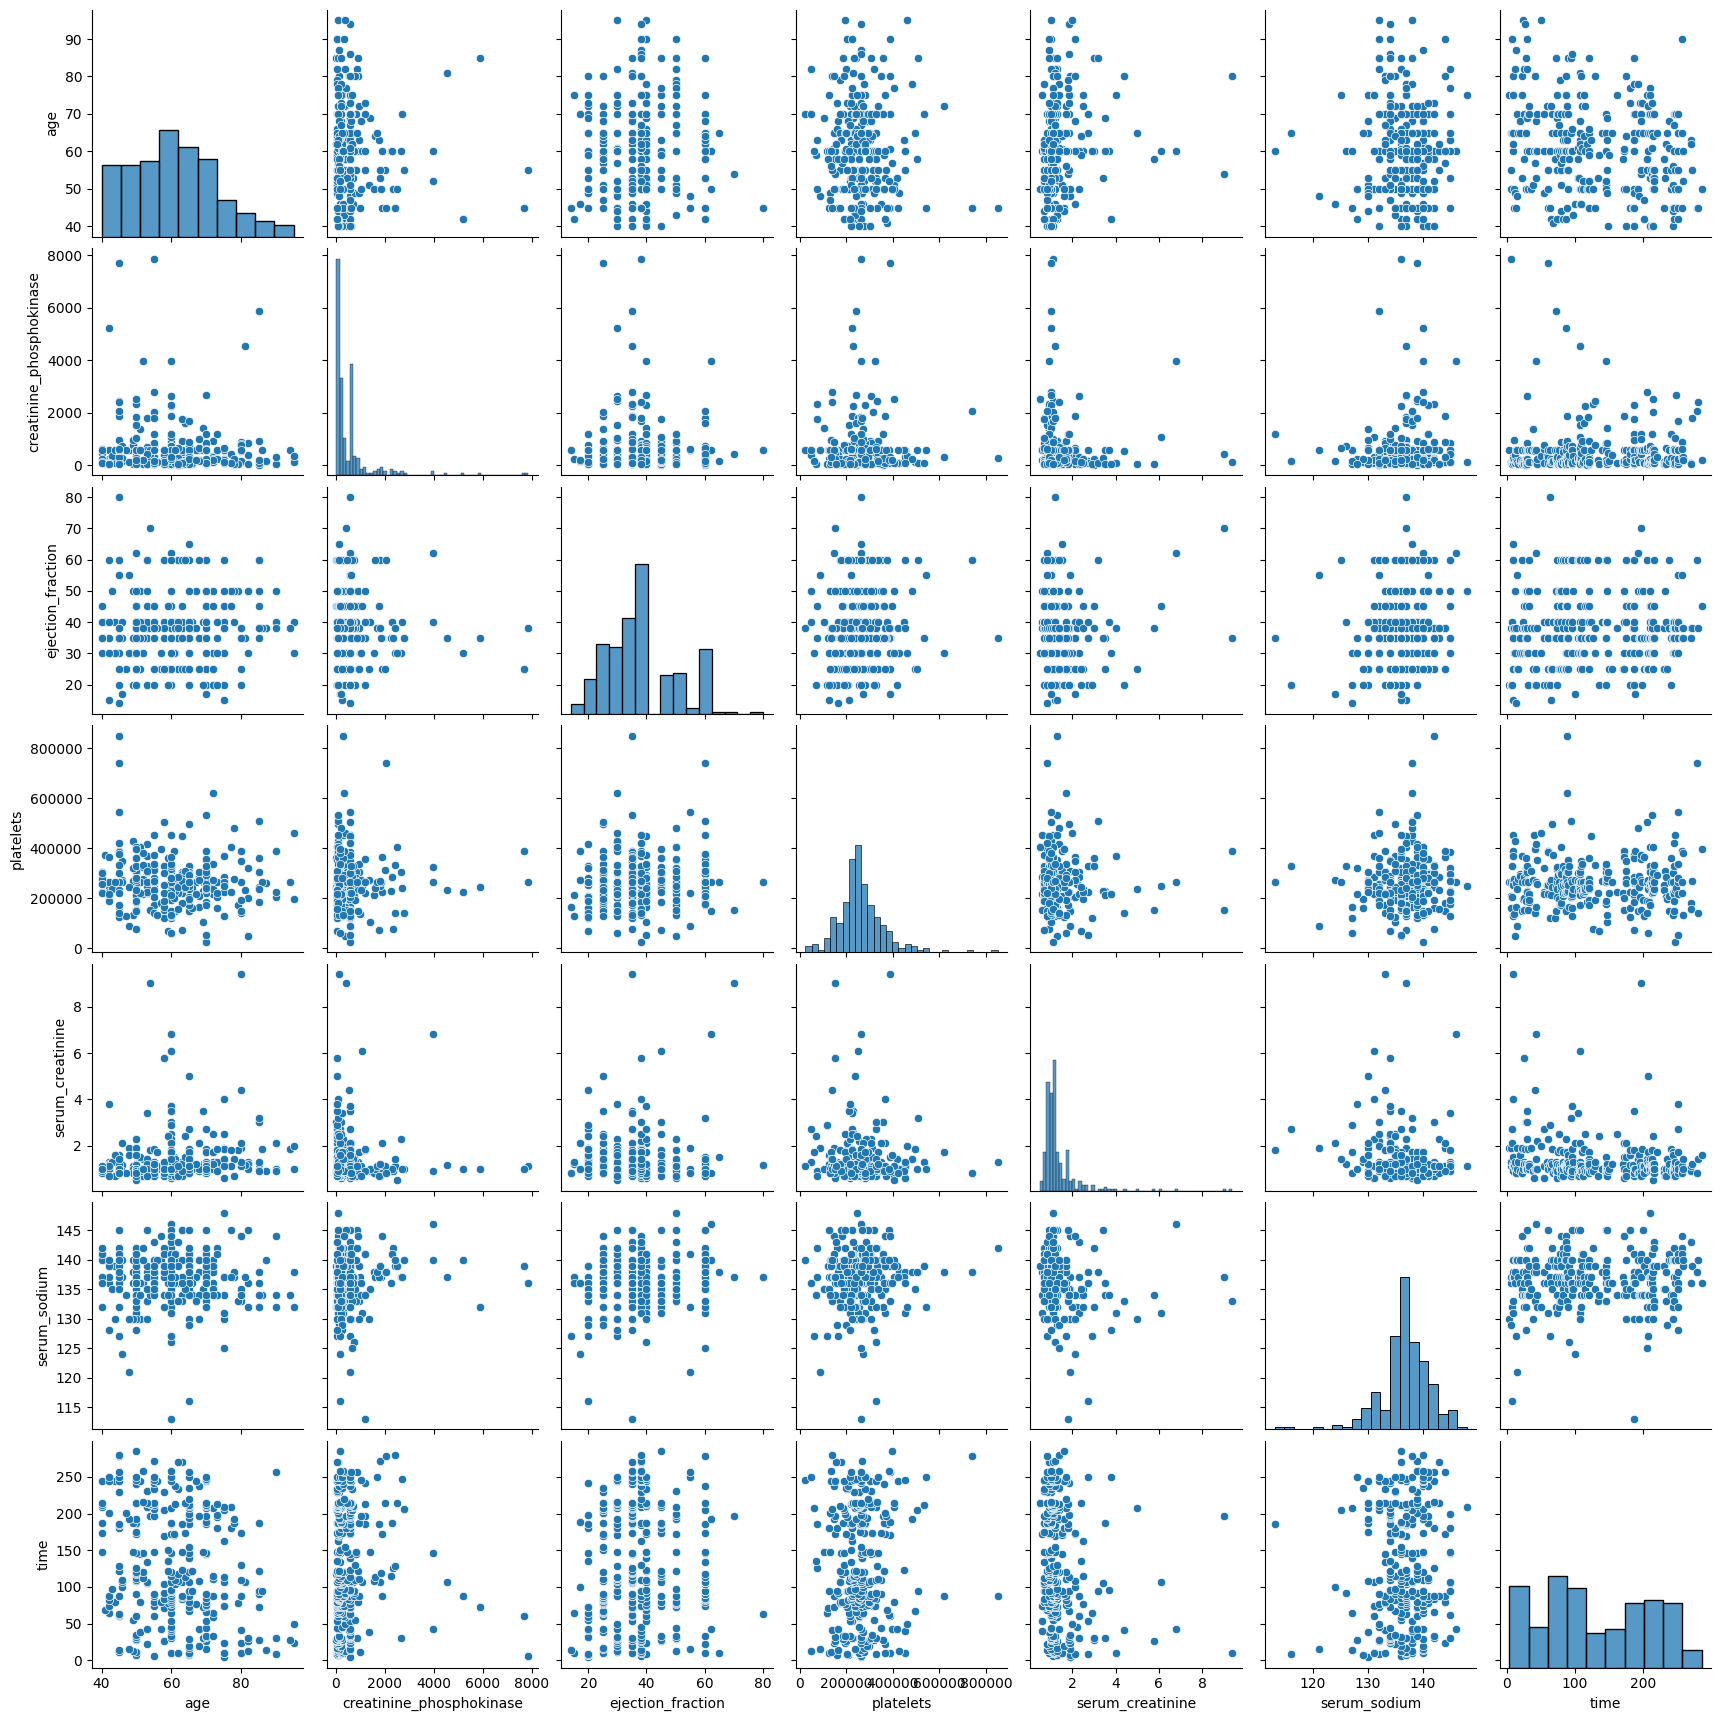

In [21]:
# Visulaizing Numerical Features

sns.pairplot(df[numerical_features])


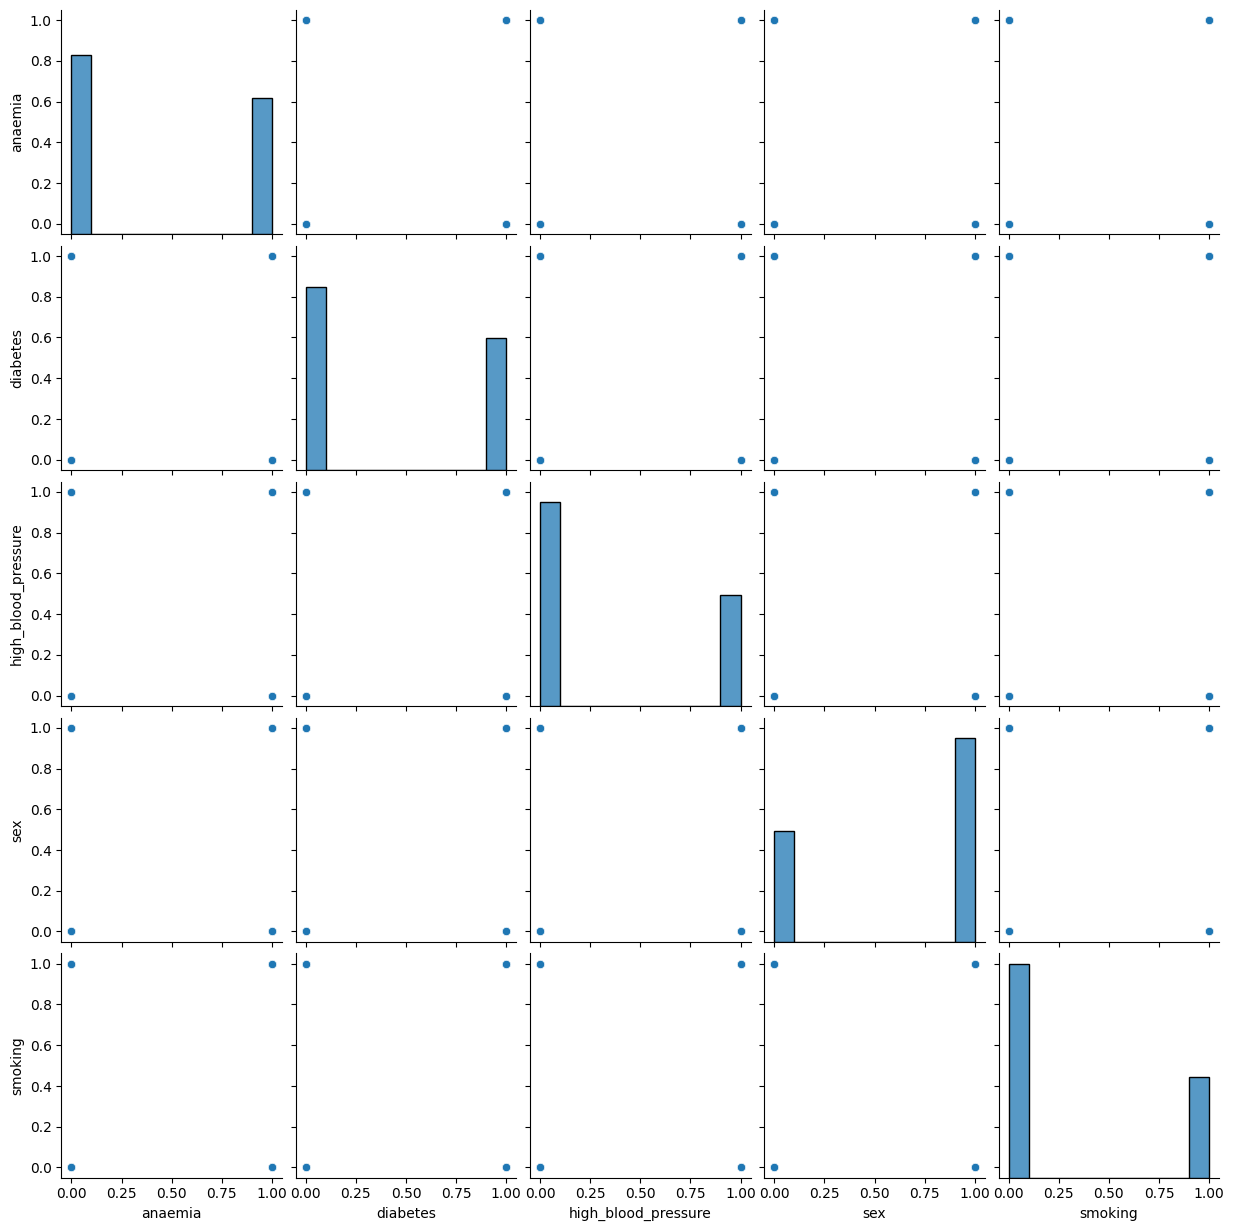

In [22]:
# Visulaizing Categorical Features

sns.pairplot(df[categorical_features])


<Axes: >

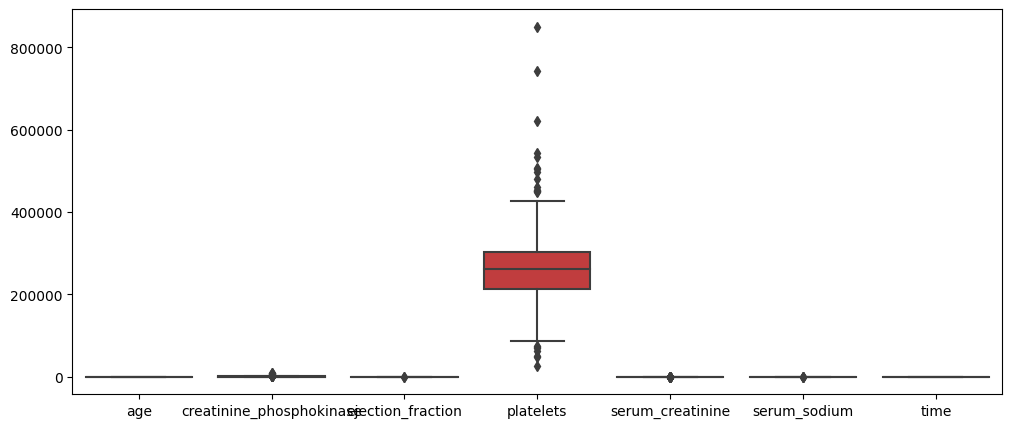

In [23]:
plt.figure(figsize = (12, 5))

sns.boxplot(df[numerical_features])

# Step 5: Data prepration (pre_processing)

### Removing outlier data for age

<Axes: xlabel='DEATH_EVENT', ylabel='age'>

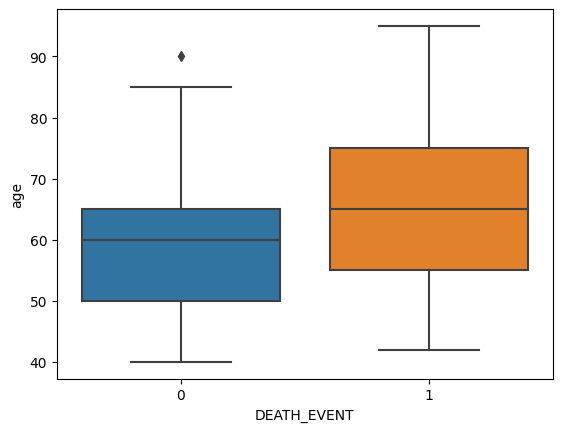

In [24]:
sns.boxplot(df, x='DEATH_EVENT', y='age')

In [32]:
numerical_features

['age',
 'creatinine_phosphokinase',
 'ejection_fraction',
 'platelets',
 'serum_creatinine',
 'serum_sodium',
 'time']

In [25]:
df[(df['age'] > 85)  & (df['DEATH_EVENT'] == 0)]

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
289,90.0,1,337,0,38,0,390000.0,0.9,144,0,0,256,0


In [29]:
index_drop_age_0 = df[(df['age'] > 85)  & (df['DEATH_EVENT'] == 0)].index
df = df.drop(index_drop_age_0, axis = 0)

### Removing outlier data for resting_blood_pressure

<Axes: xlabel='DEATH_EVENT', ylabel='creatinine_phosphokinase'>

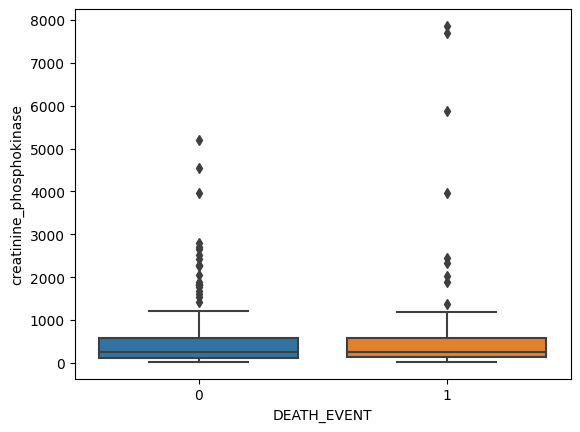

In [31]:
sns.boxplot(df, x='DEATH_EVENT', y='creatinine_phosphokinase')

In [34]:
df[(df['creatinine_phosphokinase'] >= 1500) & (df['DEATH_EVENT'] == 0)]

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
38,60.0,0,2656,1,30,0,305000.00,2.30,137,1,0,30,0
103,42.0,0,5209,0,30,0,226000.00,1.00,140,1,1,87,0
107,45.0,1,1876,1,35,0,226000.00,0.90,138,1,0,88,0
130,53.0,1,1808,0,60,1,249000.00,0.70,138,1,1,106,0
134,81.0,0,4540,0,35,0,231000.00,1.18,137,1,1,107,0
139,50.0,0,1548,0,30,1,211000.00,0.80,138,1,0,108,0
147,64.0,0,1610,0,60,0,242000.00,1.00,137,1,0,113,0
149,60.0,0,2261,0,35,1,228000.00,0.90,136,1,0,115,0
153,50.0,0,1846,1,35,0,263358.03,1.18,137,1,1,119,0
171,52.0,0,3966,0,40,0,325000.00,0.90,140,1,1,146,0


In [35]:
index_drop_resting_blood_pressure_0 = df[(df['creatinine_phosphokinase'] >= 1500) & (df['DEATH_EVENT'] == 0)].index
df = df.drop(index_drop_resting_blood_pressure_0, axis = 0)

<Axes: xlabel='DEATH_EVENT', ylabel='ejection_fraction'>

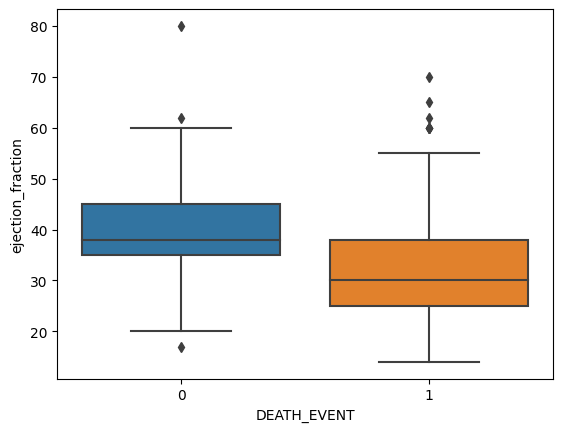

In [36]:
sns.boxplot(df, x='DEATH_EVENT', y='ejection_fraction')

In [38]:
df[((df['ejection_fraction'] > 60) | (df['ejection_fraction'] < 20)) & (df['DEATH_EVENT'] == 0)]

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
64,45.0,0,582,0,80,0,263358.03,1.18,137,0,0,63,0
210,70.0,0,212,1,17,1,389000.00,1.00,136,1,1,188,0
211,50.0,0,582,0,62,1,147000.00,0.80,140,1,1,192,0


In [ ]:
index_drop_resting_blood_pressure_0 = df[((df['ejection_fraction'] > 60) | (df['ejection_fraction'] < 20)) & (df['DEATH_EVENT'] == 0)].index
df = df.drop(index_drop_resting_blood_pressure_0, axis = 0)

In [42]:
df[(df['ejection_fraction'] > 55) & (df['DEATH_EVENT'] == 1)]

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT


In [41]:
index_drop_resting_blood_pressure_1 = df[(df['ejection_fraction'] > 55) & (df['DEATH_EVENT'] == 1)].index
df = df.drop(index_drop_resting_blood_pressure_1, axis = 0)

<Axes: xlabel='DEATH_EVENT', ylabel='serum_creatinine'>

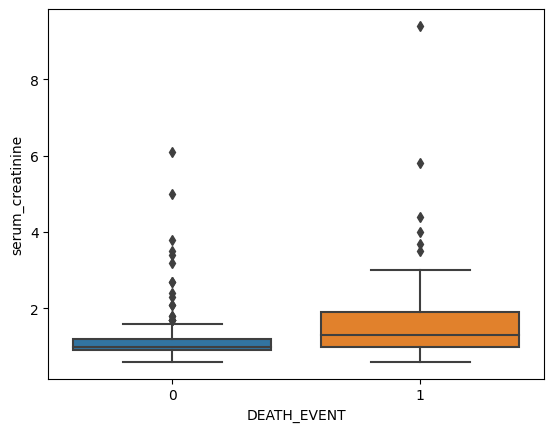

In [53]:
sns.boxplot(df, x='DEATH_EVENT', y='serum_creatinine')

## Removing outlier data for serum_sodium

In [44]:
df.shape

(270, 13)

<Axes: xlabel='DEATH_EVENT', ylabel='serum_sodium'>

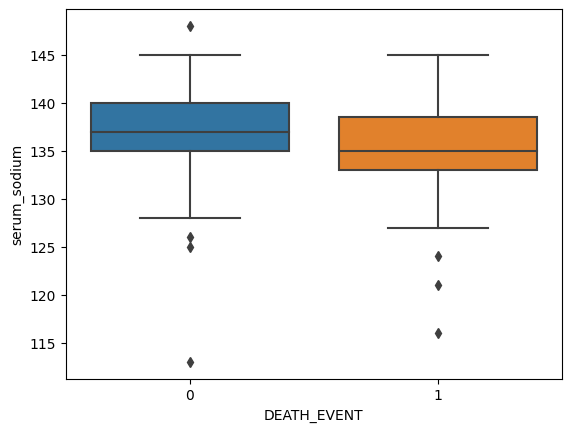

In [43]:
sns.boxplot(df, x='DEATH_EVENT', y='serum_sodium')

In [48]:
df[((df['serum_sodium'] > 145) | (df['serum_sodium'] < 128)) & (df['DEATH_EVENT'] == 0)]

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
114,60.0,1,754,1,40,1,328000.00,1.2,126,1,0,91,0
199,60.0,0,1211,1,35,0,263358.03,1.8,113,1,1,186,0
225,75.0,0,675,1,60,0,265000.00,1.4,125,0,0,205,0
236,75.0,0,119,0,50,1,248000.00,1.1,148,1,0,209,0


In [51]:
index_drop_cholesterol_0 = df[((df['serum_sodium'] > 145) | (df['serum_sodium'] < 128)) & (df['DEATH_EVENT'] == 0)].index
df = df.drop(index_drop_cholesterol_0, axis = 0)

In [50]:
df[(df['serum_sodium'] < 126) & (df['DEATH_EVENT'] == 1)]

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
4,65.0,1,160,1,20,0,327000.0,2.7,116,0,0,8,1
19,48.0,1,582,1,55,0,87000.0,1.9,121,0,0,15,1
126,46.0,0,168,1,17,1,271000.0,2.1,124,0,0,100,1


In [52]:
index_drop_cholesterol_1 = df[(df['serum_sodium'] < 126) & (df['DEATH_EVENT'] == 1)].index
df = df.drop(index_drop_cholesterol_1, axis = 0)

### Removing outlier data for time

<Axes: xlabel='DEATH_EVENT', ylabel='time'>

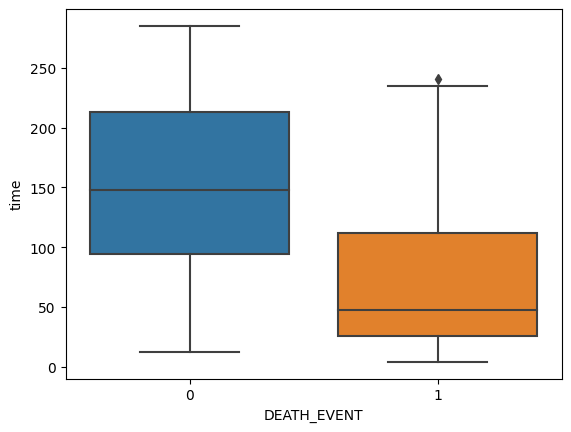

In [54]:
sns.boxplot(df, x='DEATH_EVENT', y='time')

In [59]:
df[(df['time'] >240 ) & (df['DEATH_EVENT'] == 1)]

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT


In [58]:
index_drop_time_0 = df[(df['time'] >240 ) & (df['DEATH_EVENT'] == 1)].index
df = df.drop(index_drop_time_0, axis = 0)

<Axes: xlabel='DEATH_EVENT', ylabel='platelets'>

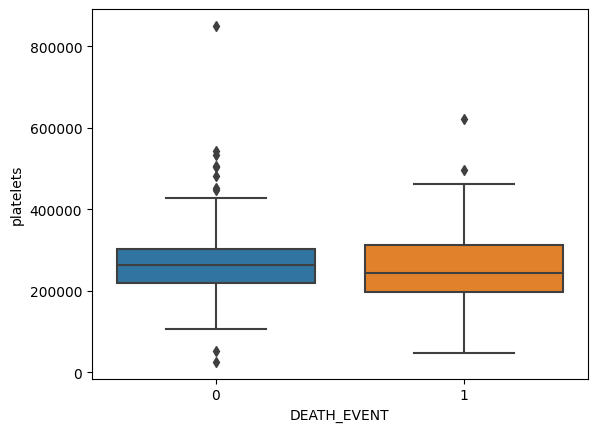

In [60]:
sns.boxplot(df, x='DEATH_EVENT', y='platelets')         

In [62]:
df[(df['platelets'] > 470000) & (df['DEATH_EVENT'] == 1)]

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
69,65.0,0,113,1,25,0,497000.0,1.83,135,1,0,67,1
105,72.0,1,328,0,30,1,621000.0,1.70,138,0,1,88,1


In [63]:
index_drop_platelets_1 = df[(df['platelets'] > 470000) & (df['DEATH_EVENT'] == 1)].index
df = df.drop(index_drop_platelets_1, axis = 0)

In [66]:
df[(df['platelets'] > 452000) & (df['DEATH_EVENT'] == 0)]

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
109,45.0,0,292,1,35,0,850000.0,1.3,142,1,1,88,0
117,85.0,1,102,0,60,0,507000.0,3.2,138,0,0,94,0
212,78.0,0,224,0,50,0,481000.0,1.4,138,1,1,192,0
224,58.0,0,582,1,25,0,504000.0,1.0,138,1,0,205,0
240,70.0,0,81,1,35,1,533000.0,1.3,139,0,0,212,0
287,45.0,0,582,1,55,0,543000.0,1.0,132,0,0,250,0


In [67]:
index_drop_platelets_achieved_0 =df[(df['platelets'] > 452000) & (df['DEATH_EVENT'] == 0)].index
df = df.drop(index_drop_platelets_achieved_0, axis = 0)

In [69]:
df.shape

(254, 13)

# Step 6: Scaling the Features

In [68]:
from sklearn.preprocessing import StandardScaler

In [70]:
scaler= StandardScaler()

In [71]:
#scale selected data

df[numerical_features] = scaler.fit_transform(df[numerical_features])


In [72]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,1.239167,0,0.169937,0,-1.535622,1,0.158133,0.588449,-1.792933,1,0,-1.629770,1
1,-0.484695,0,8.992026,0,0.063664,0,0.136980,-0.273586,-0.206156,1,0,-1.603646,1
2,0.377236,0,-0.358492,0,-1.535622,0,-1.168782,-0.058077,-2.057396,1,1,-1.590585,1
3,-0.915660,1,-0.400912,0,-1.535622,0,-0.550414,0.588449,0.058307,1,0,-1.590585,1
5,2.532063,1,-0.478479,0,0.241362,1,-0.627710,0.803958,-1.264007,1,1,-1.577523,1


# Step 6: Determine the features & DEATH_EVENT label

In [73]:
X=df.drop('DEATH_EVENT',axis=1)
y=df['DEATH_EVENT']

# Step 8:Split the Dataset to Train & Test

In [76]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# Step 9:Train the Model using the X_train and y_train

In [77]:
from sklearn.svm import SVC

In [78]:
svm_model= SVC()

In [79]:
svm_model.fit(X_train, y_train)

SVC()

# Step 10: Predicting Test Data

In [80]:
y_pred= svm_model.predict(X_test)

In [81]:
#The prediction Value VS Actual Value of Test Data
pd.DataFrame({'Y_Test':y_test, 'Y_Pred': y_pred}).head(10)

,Y_Test,Y_Pred
285,0,0
223,0,0
291,0,0
169,0,0
241,0,0
294,0,0
273,0,0
228,0,1
216,0,0
167,1,1


# Step 11: Evaluating the Model

In [82]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn import metrics

In [83]:
accuracy_score(y_test, y_pred)

0.8823529411764706

In [84]:
confusion_matrix(y_test, y_pred)

array([[33,  3],
       [ 3, 12]])

In [85]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92        36
           1       0.80      0.80      0.80        15

    accuracy                           0.88        51
   macro avg       0.86      0.86      0.86        51
weighted avg       0.88      0.88      0.88        51



## Hyperparameters

In [86]:
from sklearn.model_selection import GridSearchCV

In [87]:
svm = SVC()
param_grid = {'C':[0.01,0.1,1, 10, 100, 1000],'gamma':[1, 0.1, 0.01, 0.001, 0.0001],'kernel':['linear','rbf']}
grid = GridSearchCV(svm,param_grid, cv=5)

In [88]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'rbf']})

In [89]:
grid.best_estimator_

SVC(C=100, gamma=0.01)

In [90]:
grid.best_params_

{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}

In [91]:
y_pred_grid= grid.predict(X_test)

In [92]:
accuracy_score(y_test, y_pred_grid)

0.9215686274509803

In [93]:
print(classification_report(y_test, y_pred_grid))

              precision    recall  f1-score   support

           0       0.97      0.92      0.94        36
           1       0.82      0.93      0.87        15

    accuracy                           0.92        51
   macro avg       0.90      0.93      0.91        51
weighted avg       0.93      0.92      0.92        51

